### Task 1  
Implement the OR Boolean logic gate using perceptron Neural Network. Inputs = x1, x2 and 
bias, weights should be fed into the perceptron with single Output = y. Display final weights 
and bias of each perceptron.

In [42]:
import numpy as np

In [43]:
def step(z):
    return 1 if z >= 1 else 0

In [44]:
w1 = 1
w2 = 1
b = 0

X =np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])
Y = np.array([0,1,1,1])

In [45]:
z = np.dot(X, np.array([w1, w2])) + b
predictions = np.array([step(i) for i in z])

In [46]:
predictions

array([0, 1, 1, 1])

### Task 2 
- Use the heart disease Dataset  
- Create an Auto Encoder and fit it with our data using 3 neurons in the dense layer 
- Display new reduced dimension values 
- Plot loss for different Auto encoders

In [47]:
import pandas as pd

In [48]:
X = pd.read_csv('Data/heart.csv')

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [51]:
autoencoder = Sequential([
    Input(shape = (X.shape[1], )),
    Dense(3, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

In [52]:
autoencoder.compile(optimizer='adam', loss='mse')

In [53]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2515 - val_loss: 1.1724
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2214 - val_loss: 1.1460
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1920 - val_loss: 1.1183
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1609 - val_loss: 1.0897
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1281 - val_loss: 1.0596
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0948 - val_loss: 1.0293
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0616 - val_loss: 0.9989
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0309 - val_loss: 0.9719
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0033 - val_loss: 0.9475
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9790 - val_loss: 0.9265
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9586 - val_loss: 0.9087
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9414 - val_lo

In [54]:
encoder  =Sequential([autoencoder.layers[0]])
encoded_data = encoder.predict(X_scaled)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


The reduced dimention values are as follows:

In [55]:
encoded_data

array([[2.6006954 , 0.        , 2.8786101 ],
       [4.6247406 , 4.141082  , 0.        ],
       [5.9165525 , 1.2400119 , 0.        ],
       ...,
       [6.4260826 , 0.27540517, 2.3368797 ],
       [0.2857455 , 2.299008  , 8.678795  ],
       [5.1289797 , 0.        , 1.1936338 ]],
      shape=(1025, 3), dtype=float32)

In [56]:
preds = []
loss = []
for i in range(1,5):
    autoencoder = Sequential([
        Input(shape = (X.shape[1], )),
        Dense(i, activation='relu'),
        Dense(X.shape[1], activation='sigmoid')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    history = autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=16, shuffle=True, validation_split=0.2)
    preds.append(autoencoder.predict(X_scaled))
    loss.append(history.history['loss'])
    print(f'Encoding Dimension: {i}, Loss: {loss[-1]}')

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2385 - val_loss: 1.1537
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2215 - val_loss: 1.1352
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2050 - val_loss: 1.1178
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1894 - val_loss: 1.1010
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1743 - val_loss: 1.0853
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1600 - val_loss: 1.0701
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1465 - val_loss: 1.0565
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1338 - val_loss: 1.0435
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1218 - val_loss: 1.0313
Epoch 10/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1108 - val_loss: 1.0201
Epoch 11/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1005 - val_loss: 1.0100
Epoch 12/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0909 - val_lo

In [57]:
loss

[[1.2384586334228516,
  1.2215328216552734,
  1.205014705657959,
  1.1893672943115234,
  1.1742677688598633,
  1.1600158214569092,
  1.1465078592300415,
  1.133806586265564,
  1.1218146085739136,
  1.110803246498108,
  1.1005158424377441,
  1.0908856391906738,
  1.0821701288223267,
  1.0741585493087769,
  1.0668381452560425,
  1.0602295398712158,
  1.0543524026870728,
  1.048801302909851,
  1.0435290336608887,
  1.0384565591812134],
 [1.2878590822219849,
  1.2598187923431396,
  1.2351021766662598,
  1.2124847173690796,
  1.1901849508285522,
  1.1678563356399536,
  1.145045280456543,
  1.121875524520874,
  1.0983086824417114,
  1.0746984481811523,
  1.0514470338821411,
  1.0292381048202515,
  1.0090503692626953,
  0.9917647838592529,
  0.9772189259529114,
  0.9649945497512817,
  0.9550153017044067,
  0.9468544721603394,
  0.9402382969856262,
  0.9347590208053589],
 [1.3135099411010742,
  1.2749431133270264,
  1.2437139749526978,
  1.2170566320419312,
  1.1925243139266968,
  1.1682037115

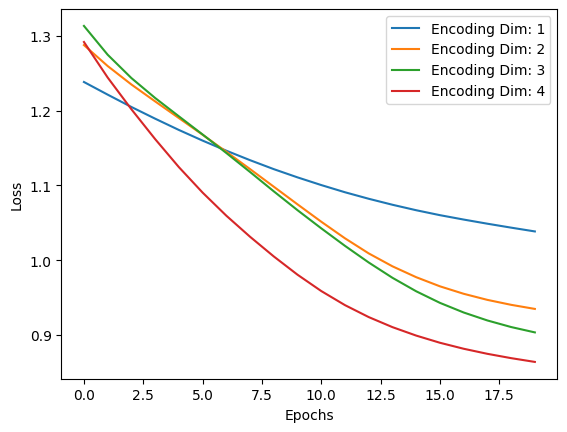

In [59]:
import matplotlib.pyplot as plt

for i in range(4):
    plt.plot(loss[i], label=f'Encoding Dim: {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()